# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import the classification report
from sklearn.metrics import classification_report

# Import the f1 score
from sklearn.metrics import f1_score

# Import train test split
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import the datasets
convabuse = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv')
dynamically_generated_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_final.csv')
us_elections_2020_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/us_elections_2020_hate_speech_final.csv')
mlma_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/MLMA_hate_speech_final.csv')

In [3]:
convabuse.head()

,example_no,annotator_id,bot,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit,abuse_level
0,0,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,CarbonBot,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [5]:
dynamically_generated_hate_speech.head()

,label,type,annotator,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,0,16,0,0,0,0,0,0,0,0,1,1
1,1.0,-1,9,0,0,0,0,0,0,1,0,0,1
2,1.0,-1,16,1,0,0,0,0,0,0,0,0,1
3,1.0,0,2,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,17,1,0,0,0,0,0,0,0,0,1


In [6]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]

In [7]:
us_elections_2020_hate_speech.head()

,index,Trump,Biden,HOF
0,873,1.0,4.0,1
1,2947,0.0,3.0,1
2,2274,0.0,4.0,1
3,902,1.0,4.0,1
4,554,4.0,1.0,1


In [8]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]

In [9]:
mlma_hate_speech.head()

,HITId,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,hateful_sentiment,normal_sentiment,offensive_sentiment,disrespectful_sentiment,abusive_sentiment,fearful_sentiment,target_group
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
mlma_hate_speech_X = mlma_hate_speech.drop("target_group", axis=1)
mlma_hate_speech_y = mlma_hate_speech["target_group"]

# Linear Modeling

In [11]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)

In [12]:
# Use standard scaler on the Convabuse data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [13]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [14]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [15]:
# Use standard scaler on the MLMS hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [16]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric.columns]:
  print(columns)

Index(['example_no', 'annotator_id', 'ableism', 'homophobic', 'intellectual',
       'racist', 'sexist', 'sex_harassment', 'transphobic', 'generalised',
       'individual', 'system', 'explicit', 'implicit'],
      dtype='object')
Index(['type', 'annotator', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['index', 'Trump', 'Biden'], dtype='object')
Index(['HITId', 'directness', 'shock_annotator_sentiment',
       'anger_annotator_sentiment', 'confusion_annotator_sentiment',
       'sadness_annotator_sentiment', 'indifference_annotator_sentiment',
       'disgust_annotator_sentiment', 'fear_annotator_sentiment',
       'hateful_sentiment', 'normal_sentiment', 'offensive_sentiment',
       'disrespectful_sentiment', 'abusive_sentiment', 'fearful_sentiment'],
      dtype='object')


In [17]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)

In [18]:
regularizers = ["l1", "l2"]

In [19]:
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

In [20]:
l1_ratio_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [21]:
logistic_regression_model_results = []

## Convabuse Logistic Regression

In [22]:
convabuse_results_list = []

# Use logistic regression with L1, L2, and ElasticNet regularization with standardized features of the Convabuse dataset
for regularizer in regularizers:
  for solver in solvers:
    if regularizer == "l1" and solver not in ["liblinear", "saga"]:
      continue
    convabuse_logistic_regression = LogisticRegression(penalty=regularizer, solver=solver, random_state=42)
    convabuse_logistic_regression.fit(convabuse_X_train, convabuse_y_train)
    # Predict the target variable for the test set
    convabuse_y_pred = convabuse_logistic_regression.predict(convabuse_X_test)

    # Calculate the accuracy of the model
    convabuse_accuracy = accuracy_score(convabuse_y_test, convabuse_y_pred)
    convabuse_f1_score = f1_score(convabuse_y_test, convabuse_y_pred, average='weighted') # Weighted average due to multiclass
    convabuse_results_list.append(("Convabuse", regularizer, solver, convabuse_accuracy, convabuse_f1_score, 0))
    print(f"Regularizer: {regularizer}, Solver: {solver}, Accuracy: {convabuse_accuracy}, F1-score: {convabuse_f1_score}")

Regularizer: l1, Solver: liblinear, Accuracy: 0.5239372268573699, F1-score: 0.5262941973057333
Regularizer: l1, Solver: saga, Accuracy: 0.5219507350019865, F1-score: 0.5254609678210449
Regularizer: l2, Solver: lbfgs, Accuracy: 0.5233412793007549, F1-score: 0.5268710129452616
Regularizer: l2, Solver: liblinear, Accuracy: 0.523440603893524, F1-score: 0.5258012617622702
Regularizer: l2, Solver: newton-cg, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: l2, Solver: newton-cholesky, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: l2, Solver: sag, Accuracy: 0.521652761223679, F1-score: 0.5251644697842732
Regularizer: l2, Solver: saga, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445


In [23]:
for ratio in l1_ratio_list:
    convabuse_logistic_regression = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=ratio, random_state=42)
    convabuse_logistic_regression.fit(convabuse_X_train, convabuse_y_train)
    # Predict the target variable for the test set
    convabuse_y_pred = convabuse_logistic_regression.predict(convabuse_X_test)

    # Calculate the accuracy of the model
    convabuse_accuracy = accuracy_score(convabuse_y_test, convabuse_y_pred)
    convabuse_results_list.append(("Convabuse", "elasticnet", "saga", convabuse_accuracy, convabuse_f1_score, ratio))
    print(f"Regularizer: elasticnet, l1_ratio: {ratio}, Accuracy: {convabuse_accuracy}, F1-score: {convabuse_f1_score}")

Regularizer: elasticnet, l1_ratio: 0.1, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: elasticnet, l1_ratio: 0.2, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: elasticnet, l1_ratio: 0.3, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: elasticnet, l1_ratio: 0.4, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: elasticnet, l1_ratio: 0.5, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: elasticnet, l1_ratio: 0.6, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: elasticnet, l1_ratio: 0.7, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: elasticnet, l1_ratio: 0.8, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445
Regularizer: elasticnet, l1_ratio: 0.9, Accuracy: 0.5217520858164482, F1-score: 0.5252633241546445


In [24]:
# Convert the results list into a dataframe
convabuse_results = pd.DataFrame(convabuse_results_list, columns=["Dataset", "Regularizer", "Solver", "Accuracy", "F1-score", "Ratio"])
convabuse_results

,Dataset,Regularizer,Solver,Accuracy,F1-score,Ratio
0,Convabuse,l1,liblinear,0.523937,0.526294,0.0
1,Convabuse,l1,saga,0.521951,0.525461,0.0
2,Convabuse,l2,lbfgs,0.523341,0.526871,0.0
3,Convabuse,l2,liblinear,0.523441,0.525801,0.0
4,Convabuse,l2,newton-cg,0.521752,0.525263,0.0
5,Convabuse,l2,newton-cholesky,0.521752,0.525263,0.0
6,Convabuse,l2,sag,0.521653,0.525164,0.0
7,Convabuse,l2,saga,0.521752,0.525263,0.0
8,Convabuse,elasticnet,saga,0.521752,0.525263,0.1
9,Convabuse,elasticnet,saga,0.521752,0.525263,0.2


In [25]:
convabuse_best_model_params = convabuse_results.loc[convabuse_results["Accuracy"].idxmax()]
convabuse_best_model_params

,0
Dataset,Convabuse
Regularizer,l1
Solver,liblinear
Accuracy,0.523937
F1-score,0.526294
Ratio,0.0


In [26]:
# Use the best parameters to create a new best model
convabuse_best_model = LogisticRegression(penalty=convabuse_best_model_params["Regularizer"], solver=convabuse_best_model_params["Solver"], random_state=42)
convabuse_best_model.fit(convabuse_X_train, convabuse_y_train)

# Predict the target variable for the test set
convabuse_y_pred = convabuse_best_model.predict(convabuse_X_test)

# Calculate the accuracy of the model
convabuse_accuracy = accuracy_score(convabuse_y_test, convabuse_y_pred)
convabuse_f1_score = f1_score(convabuse_y_test, convabuse_y_pred, average='weighted')
logistic_regression_model_results.append(("Convabuse", convabuse_best_model_params["Regularizer"], convabuse_best_model_params["Solver"], convabuse_accuracy, convabuse_f1_score, 0.0))

print(f"Regularizer: {convabuse_best_model_params['Regularizer']}, Solver: {convabuse_best_model_params['Solver']}, Accuracy: {convabuse_accuracy}, F1-score: {convabuse_f1_score}")

Regularizer: l1, Solver: liblinear, Accuracy: 0.5239372268573699, F1-score: 0.5262941973057333


In [27]:
# Get the best correlated feature with the target variable
convabuse_best_correlated_feature = convabuse_X_train.corrwith(convabuse_y_train).abs().idxmax()
convabuse_best_correlated_feature

'explicit'

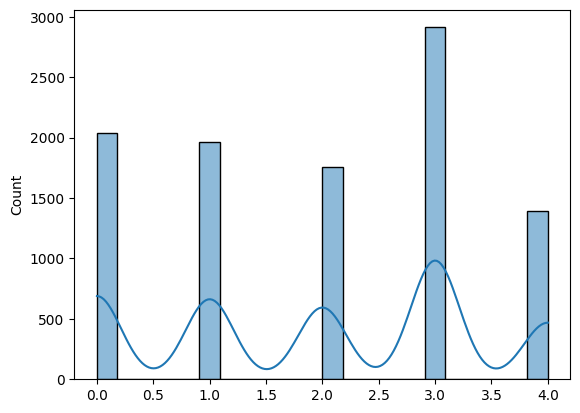

In [28]:
# Plot the predictions that were generated as a histogram using seaborn colored by correct vs incorrect predictions
sns.histplot(convabuse_y_pred, kde=True)
plt.show()

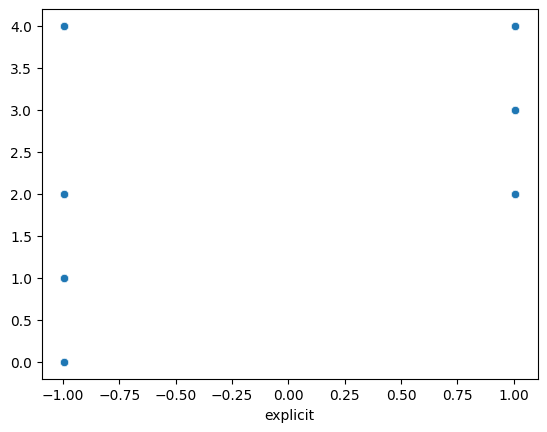

In [29]:
# Plot the predictions that were generated as a scatterplot plotted against the best correlated feature
sns.scatterplot(x=convabuse_X_test[convabuse_best_correlated_feature], y=convabuse_y_pred)
plt.show()

## Dynamicaly Generated Hate Speech Logistic Regression

In [30]:
dghs_results_list = []

# Use logistic regression with L1, L2, and ElasticNet regularization with standardized features of the Dynamically Generated Hate Speech dataset
for regularizer in regularizers:
  for solver in solvers:
    if regularizer == "l1" and solver not in ["liblinear", "saga"]:
      continue
    dghs_logistic_regression = LogisticRegression(penalty=regularizer, solver=solver, random_state=42)
    dghs_logistic_regression.fit(dghs_X_train, dghs_y_train)
    # Predict the target variable for the test set
    dghs_y_pred = dghs_logistic_regression.predict(dghs_X_test)

    # Calculate the accuracy of the model
    dghs_accuracy = accuracy_score(dghs_y_test, dghs_y_pred)
    dghs_f1_score = f1_score(dghs_y_test, dghs_y_pred)
    dghs_results_list.append(("DGHS", regularizer, solver, dghs_accuracy, dghs_f1_score, 0))
    print(f"Regularizer: {regularizer}, Solver: {solver}, Accuracy: {dghs_accuracy}, F1-score: {dghs_f1_score}")

Regularizer: l1, Solver: liblinear, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: l1, Solver: saga, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: l2, Solver: lbfgs, Accuracy: 0.8376383763837638, F1-score: 0.8065326633165829
Regularizer: l2, Solver: liblinear, Accuracy: 0.8376383763837638, F1-score: 0.8065326633165829
Regularizer: l2, Solver: newton-cg, Accuracy: 0.8376383763837638, F1-score: 0.8065326633165829
Regularizer: l2, Solver: newton-cholesky, Accuracy: 0.8376383763837638, F1-score: 0.8065326633165829
Regularizer: l2, Solver: sag, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: l2, Solver: saga, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663


In [31]:
for ratio in l1_ratio_list:
    dghs_logistic_regression = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=ratio, random_state=42)
    dghs_logistic_regression.fit(dghs_X_train, dghs_y_train)
    # Predict the target variable for the test set
    dghs_y_pred = dghs_logistic_regression.predict(dghs_X_test)

    # Calculate the accuracy of the model
    dghs_accuracy = accuracy_score(dghs_y_test, dghs_y_pred)
    dghs_f1_score = f1_score(dghs_y_test, dghs_y_pred)
    dghs_results_list.append(("DGHS", "elasticnet", "saga", dghs_accuracy, dghs_f1_score, ratio))
    print(f"Regularizer: elasticnet, l1_ratio: {ratio}, Accuracy: {dghs_accuracy}, F1-score: {dghs_f1_score}")

Regularizer: elasticnet, l1_ratio: 0.1, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: elasticnet, l1_ratio: 0.2, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: elasticnet, l1_ratio: 0.3, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: elasticnet, l1_ratio: 0.4, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: elasticnet, l1_ratio: 0.5, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: elasticnet, l1_ratio: 0.6, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: elasticnet, l1_ratio: 0.7, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: elasticnet, l1_ratio: 0.8, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663
Regularizer: elasticnet, l1_ratio: 0.9, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663


In [32]:
# Convert the results list into a dataframe
dghs_results = pd.DataFrame(dghs_results_list, columns=["Dataset", "Regularizer", "Solver", "Accuracy", "F1-score", "Ratio"])
dghs_results

,Dataset,Regularizer,Solver,Accuracy,F1-score,Ratio
0,DGHS,l1,liblinear,0.837770,0.806720,0.0
1,DGHS,l1,saga,0.837770,0.806720,0.0
2,DGHS,l2,lbfgs,0.837638,0.806533,0.0
3,DGHS,l2,liblinear,0.837638,0.806533,0.0
4,DGHS,l2,newton-cg,0.837638,0.806533,0.0
5,DGHS,l2,newton-cholesky,0.837638,0.806533,0.0
6,DGHS,l2,sag,0.837770,0.806720,0.0
7,DGHS,l2,saga,0.837770,0.806720,0.0
8,DGHS,elasticnet,saga,0.837770,0.806720,0.1
9,DGHS,elasticnet,saga,0.837770,0.806720,0.2


In [33]:
dghs_best_model_params = dghs_results.loc[dghs_results["Accuracy"].idxmax()]
dghs_best_model_params

,0
Dataset,DGHS
Regularizer,l1
Solver,liblinear
Accuracy,0.83777
F1-score,0.80672
Ratio,0.0


In [34]:
# Use the best parameters to create a new best model
dghs_best_model = LogisticRegression(penalty=dghs_best_model_params["Regularizer"], solver=dghs_best_model_params["Solver"], random_state=42)
dghs_best_model.fit(dghs_X_train, dghs_y_train)

# Predict the target variable for the test set
dghs_y_pred = dghs_best_model.predict(dghs_X_test)

# Calculate the accuracy of the model
dghs_accuracy = accuracy_score(dghs_y_test, dghs_y_pred)
dghs_f1_score = f1_score(dghs_y_test, dghs_y_pred)
logistic_regression_model_results.append(("DGHS", dghs_best_model_params["Regularizer"], dghs_best_model_params["Solver"], dghs_accuracy, dghs_f1_score, 0.0))

print(f"Regularizer: {dghs_best_model_params['Regularizer']}, Solver: {dghs_best_model_params['Solver']}, Accuracy: {dghs_accuracy}, F1-score: {dghs_f1_score}")

Regularizer: l1, Solver: liblinear, Accuracy: 0.8377701634159199, F1-score: 0.8067200502433663


In [35]:
# Get the best correlated feature with the target variable
dghs_best_correlated_feature = dghs_X_train.corrwith(dghs_y_train).abs().idxmax()
dghs_best_correlated_feature

'none'

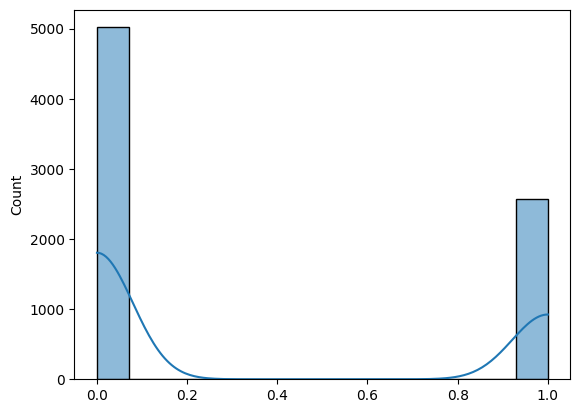

In [36]:
# Plot the predictions that were generated as a histogram using seaborn colored by correct vs incorrect predictions
sns.histplot(dghs_y_pred, kde=True)
plt.show()

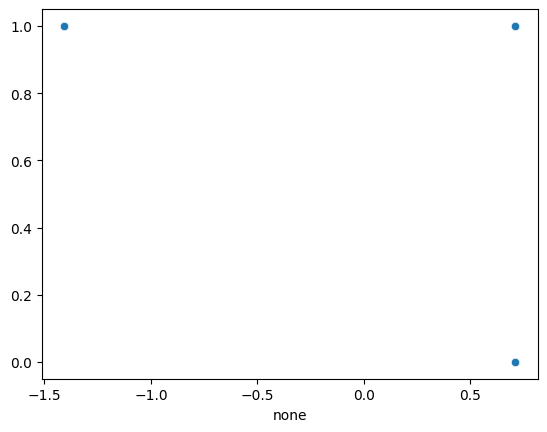

In [37]:
# Plot the predictions that were generated as a scatterplot plotted against the best correlated feature
sns.scatterplot(x=dghs_X_test[dghs_best_correlated_feature], y=dghs_y_pred)
plt.show()

## US Elections 2020 Hate Speech Logistic Regression

In [38]:
us2020hs_results_list = []

# Use logistic regression with L1, L2, and ElasticNet regularization with standardized features of the Dynamically Generated Hate Speech dataset
for regularizer in regularizers:
  for solver in solvers:
    if regularizer == "l1" and solver not in ["liblinear", "saga"]:
      continue
    us2020hs_logistic_regression = LogisticRegression(penalty=regularizer, solver=solver, random_state=42)
    us2020hs_logistic_regression.fit(us2020hs_X_train, us2020hs_y_train)
    # Predict the target variable for the test set
    us2020hs_y_pred = us2020hs_logistic_regression.predict(us2020hs_X_test)

    # Calculate the accuracy of the model
    us2020hs_accuracy = accuracy_score(us2020hs_y_test, us2020hs_y_pred)
    us2020hs_f1_score = f1_score(us2020hs_y_test, us2020hs_y_pred)
    us2020hs_results_list.append(("US2020HS", regularizer, solver, us2020hs_accuracy, us2020hs_f1_score, 0))
    print(f"Regularizer: {regularizer}, Solver: {solver}, Accuracy: {us2020hs_accuracy}, F1-score: {us2020hs_f1_score}")

Regularizer: l1, Solver: liblinear, Accuracy: 0.5216981132075472, F1-score: 0.5101449275362319
Regularizer: l1, Solver: saga, Accuracy: 0.5245283018867924, F1-score: 0.5116279069767442
Regularizer: l2, Solver: lbfgs, Accuracy: 0.5226415094339623, F1-score: 0.5106382978723404
Regularizer: l2, Solver: liblinear, Accuracy: 0.5207547169811321, F1-score: 0.5096525096525096
Regularizer: l2, Solver: newton-cg, Accuracy: 0.5216981132075472, F1-score: 0.5101449275362319
Regularizer: l2, Solver: newton-cholesky, Accuracy: 0.5207547169811321, F1-score: 0.5096525096525096
Regularizer: l2, Solver: sag, Accuracy: 0.5207547169811321, F1-score: 0.5096525096525096
Regularizer: l2, Solver: saga, Accuracy: 0.5207547169811321, F1-score: 0.5096525096525096


In [39]:
for ratio in l1_ratio_list:
    us2020hs_logistic_regression = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=ratio, random_state=42)
    us2020hs_logistic_regression.fit(us2020hs_X_train, us2020hs_y_train)
    # Predict the target variable for the test set
    us2020hs_y_pred = us2020hs_logistic_regression.predict(us2020hs_X_test)

    # Calculate the accuracy of the model
    us2020hs_accuracy = accuracy_score(us2020hs_y_test, us2020hs_y_pred)
    us2020hs_f1_score = f1_score(us2020hs_y_test, us2020hs_y_pred)
    us2020hs_results_list.append(("US2020HS", "elasticnet", "saga", us2020hs_accuracy, us2020hs_f1_score, ratio))
    print(f"Regularizer: elasticnet, l1_ratio: {ratio}, Accuracy: {us2020hs_accuracy}, F1-score: {us2020hs_f1_score}")

Regularizer: elasticnet, l1_ratio: 0.1, Accuracy: 0.5226415094339623, F1-score: 0.5106382978723404
Regularizer: elasticnet, l1_ratio: 0.2, Accuracy: 0.5226415094339623, F1-score: 0.5106382978723404
Regularizer: elasticnet, l1_ratio: 0.3, Accuracy: 0.5226415094339623, F1-score: 0.5106382978723404
Regularizer: elasticnet, l1_ratio: 0.4, Accuracy: 0.5226415094339623, F1-score: 0.5106382978723404
Regularizer: elasticnet, l1_ratio: 0.5, Accuracy: 0.5226415094339623, F1-score: 0.5106382978723404
Regularizer: elasticnet, l1_ratio: 0.6, Accuracy: 0.5235849056603774, F1-score: 0.5111326234269119
Regularizer: elasticnet, l1_ratio: 0.7, Accuracy: 0.5235849056603774, F1-score: 0.5111326234269119
Regularizer: elasticnet, l1_ratio: 0.8, Accuracy: 0.5235849056603774, F1-score: 0.5111326234269119
Regularizer: elasticnet, l1_ratio: 0.9, Accuracy: 0.5235849056603774, F1-score: 0.5111326234269119


In [40]:
# Convert the results list into a dataframe
us2020hs_results = pd.DataFrame(us2020hs_results_list, columns=["Dataset", "Regularizer", "Solver", "Accuracy", "F1-score", "Ratio"])
us2020hs_results

,Dataset,Regularizer,Solver,Accuracy,F1-score,Ratio
0,US2020HS,l1,liblinear,0.521698,0.510145,0.0
1,US2020HS,l1,saga,0.524528,0.511628,0.0
2,US2020HS,l2,lbfgs,0.522642,0.510638,0.0
3,US2020HS,l2,liblinear,0.520755,0.509653,0.0
4,US2020HS,l2,newton-cg,0.521698,0.510145,0.0
5,US2020HS,l2,newton-cholesky,0.520755,0.509653,0.0
6,US2020HS,l2,sag,0.520755,0.509653,0.0
7,US2020HS,l2,saga,0.520755,0.509653,0.0
8,US2020HS,elasticnet,saga,0.522642,0.510638,0.1
9,US2020HS,elasticnet,saga,0.522642,0.510638,0.2


In [41]:
us2020hs_best_model_params = us2020hs_results.loc[us2020hs_results["Accuracy"].idxmax()]
us2020hs_best_model_params

,1
Dataset,US2020HS
Regularizer,l1
Solver,saga
Accuracy,0.524528
F1-score,0.511628
Ratio,0.0


In [42]:
# Use the best parameters to create a new best model
us2020hs_best_model = LogisticRegression(penalty=us2020hs_best_model_params["Regularizer"], solver=us2020hs_best_model_params["Solver"], random_state=4)
us2020hs_best_model.fit(us2020hs_X_train, us2020hs_y_train)

# Predict the target variable for the test set
us2020hs_y_pred = us2020hs_best_model.predict(us2020hs_X_test)

# Calculate the accuracy of the best model
us2020hs_accuracy = accuracy_score(us2020hs_y_test, us2020hs_y_pred)
us2020hs_f1_score = f1_score(us2020hs_y_test, us2020hs_y_pred)
logistic_regression_model_results.append(("US2020HS", us2020hs_best_model_params["Regularizer"], us2020hs_best_model_params["Solver"], us2020hs_accuracy, us2020hs_f1_score, 0.0))

print(f"Regularizer: {us2020hs_best_model_params['Regularizer']}, Solver: {us2020hs_best_model_params['Solver']}, Accuracy: {us2020hs_accuracy}, F1-score: {us2020hs_f1_score}")

Regularizer: l1, Solver: saga, Accuracy: 0.5245283018867924, F1-score: 0.5116279069767442


In [43]:
# Get the best correlated feature with the target variable
us2020hs_best_correlated_feature = us2020hs_X_train.corrwith(us2020hs_y_train).abs().idxmax()
us2020hs_best_correlated_feature

'Trump'

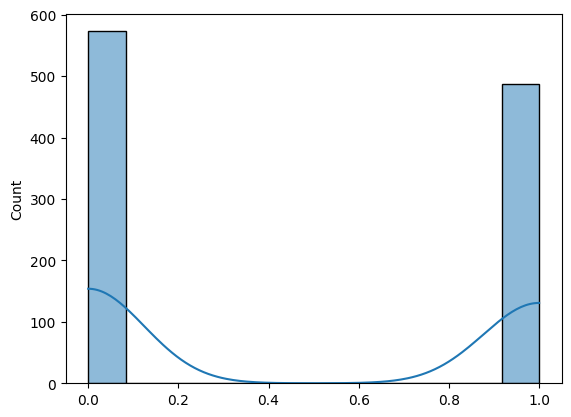

In [44]:
# Plot the predictions that were generated as a histogram using seaborn colored by correct vs incorrect predictions
sns.histplot(us2020hs_y_pred, kde=True)
plt.show()

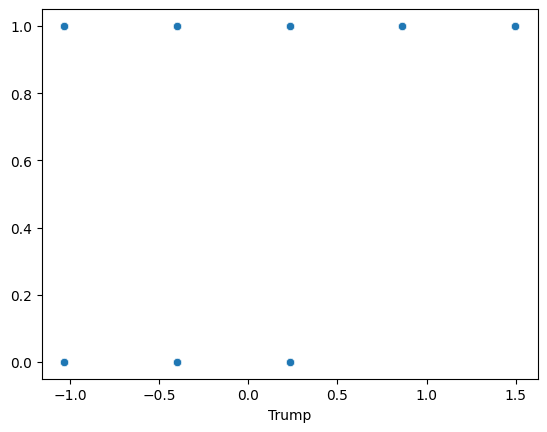

In [45]:
# Plot the predictions that were generated as a scatterplot plotted against the best correlated feature
sns.scatterplot(x=us2020hs_X_test[us2020hs_best_correlated_feature], y=us2020hs_y_pred)
plt.show()

## MLMA Hate Speech Logistic Regression

In [ ]:
# mlma_hate_speech_results_list = []

# # Use logistic regression with L1, L2, and ElasticNet regularization with standardized features of the Dynamically Generated Hate Speech dataset
# for regularizer in regularizers:
#   for solver in solvers:
#     if regularizer == "l1" and solver not in ["liblinear", "saga"]:
#       continue
#     mlma_hate_speech_logistic_regression = LogisticRegression(penalty=regularizer, solver=solver, random_state=42)
#     mlma_hate_speech_logistic_regression.fit(mlma_hate_speech_X_train, mlma_hate_speech_y_train)
#     # Predict the target variable for the test set
#     mlma_hate_speech_y_pred = mlma_hate_speech_logistic_regression.predict(mlma_hate_speech_X_test)

#     # Calculate the accuracy of the model
#     mlma_hate_speech_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred)
#     mlma_hate_speech_f1_score = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_y_pred, average='weighted')
#     mlma_hate_speech_results_list.append(("MLMA Hate Speech", regularizer, solver, mlma_hate_speech_accuracy, mlma_hate_speech_f1_score, 0))
#     print(f"Regularizer: {regularizer}, Solver: {solver}, Accuracy: {mlma_hate_speech_accuracy}, F1-score: {mlma_hate_speech_f1_score}")

Regularizer: l1, Solver: liblinear, Accuracy: 0.4184450696493515, F1-score: 0.30984297788909043
Regularizer: l1, Solver: saga, Accuracy: 1.0, F1-score: 1.0
Regularizer: l2, Solver: lbfgs, Accuracy: 0.6295432191953155, F1-score: 0.5604544558032386
Regularizer: l2, Solver: liblinear, Accuracy: 0.3309087582058144, F1-score: 0.21021749111440308
Regularizer: l2, Solver: newton-cg, Accuracy: 1.0, F1-score: 1.0
Regularizer: l2, Solver: newton-cholesky, Accuracy: 1.0, F1-score: 1.0
Regularizer: l2, Solver: sag, Accuracy: 1.0, F1-score: 1.0
Regularizer: l2, Solver: saga, Accuracy: 1.0, F1-score: 1.0


In [46]:
# Get a 10% sample of mlma_hate_speech_X_train
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.3, random_state=42)

# Split into X and y
mlma_hate_speech_X_train_sample = mlma_hate_speech_sample.drop("target_group", axis=1)
mlma_hate_speech_y_train_sample = mlma_hate_speech_sample["target_group"]

# StandardScaler
mlma_hate_speech_X_train_scaled_sample = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_train_sample)
mlma_hate_speech_X_train_scaled_sample = pd.DataFrame(mlma_hate_speech_X_train_sample, columns=mlma_hate_speech_X_train.columns)

# Train-test-split
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_train_scaled_sample, mlma_hate_speech_y_train_sample, test_size=0.2, random_state=42)

In [47]:
mlma_hate_speech_results_list = []

# Use logistic regression with L1, L2, and ElasticNet regularization with standardized features of the Dynamically Generated Hate Speech dataset
for solver in ["liblinear", "saga"]:
  mlma_hate_speech_logistic_regression = LogisticRegression(penalty="l1", solver=solver, random_state=42)
  mlma_hate_speech_logistic_regression.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)
  # Predict the target variable for the test set
  mlma_hate_speech_y_pred = mlma_hate_speech_logistic_regression.predict(mlma_hate_speech_X_test_sample)

  # Calculate the accuracy of the model
  mlma_hate_speech_accuracy = accuracy_score(mlma_hate_speech_y_test_sample, mlma_hate_speech_y_pred)
  mlma_hate_speech_f1_score = f1_score(mlma_hate_speech_y_test_sample, mlma_hate_speech_y_pred, average='weighted')
  mlma_hate_speech_results_list.append(("MLMA Hate Speech", regularizer, solver, mlma_hate_speech_accuracy, mlma_hate_speech_f1_score, 0))
  print(f"Regularizer: {regularizer}, Solver: {solver}, Accuracy: {mlma_hate_speech_accuracy}, F1-score: {mlma_hate_speech_f1_score}")

Regularizer: l2, Solver: liblinear, Accuracy: 0.2115736505032022, F1-score: 0.10737055253671493
Regularizer: l2, Solver: saga, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344


In [48]:
# Use logistic regression with L1, L2, and ElasticNet regularization with standardized features of the Dynamically Generated Hate Speech dataset
for solver in solvers:
  mlma_hate_speech_logistic_regression = LogisticRegression(penalty=regularizer, solver=solver, random_state=42)
  mlma_hate_speech_logistic_regression.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)
  # Predict the target variable for the test set
  mlma_hate_speech_y_pred = mlma_hate_speech_logistic_regression.predict(mlma_hate_speech_X_test_sample)

  # Calculate the accuracy of the model
  mlma_hate_speech_accuracy = accuracy_score(mlma_hate_speech_y_test_sample, mlma_hate_speech_y_pred)
  mlma_hate_speech_f1_score = f1_score(mlma_hate_speech_y_test_sample, mlma_hate_speech_y_pred, average='weighted')
  mlma_hate_speech_results_list.append(("MLMA Hate Speech", regularizer, solver, mlma_hate_speech_accuracy, mlma_hate_speech_f1_score, 0))
  print(f"Regularizer: {regularizer}, Solver: {solver}, Accuracy: {mlma_hate_speech_accuracy}, F1-score: {mlma_hate_speech_f1_score}")

Regularizer: l2, Solver: lbfgs, Accuracy: 0.09576090271424215, F1-score: 0.03835592795707579
Regularizer: l2, Solver: liblinear, Accuracy: 0.2257548032936871, F1-score: 0.11758731357068715
Regularizer: l2, Solver: newton-cg, Accuracy: 0.8354681305275998, F1-score: 0.7808171356305464
Regularizer: l2, Solver: newton-cholesky, Accuracy: 1.0, F1-score: 1.0
Regularizer: l2, Solver: sag, Accuracy: 0.0744129307715767, F1-score: 0.043341061502377515
Regularizer: l2, Solver: saga, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344


In [49]:
for ratio in l1_ratio_list:
    mlma_hate_speech_logistic_regression = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=ratio, random_state=42)
    mlma_hate_speech_logistic_regression.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)
    # Predict the target variable for the test set
    mlma_hate_speech_y_pred = mlma_hate_speech_logistic_regression.predict(mlma_hate_speech_X_test_sample)

    # Calculate the accuracy of the model
    mlma_hate_speech_accuracy = accuracy_score(mlma_hate_speech_y_test_sample, mlma_hate_speech_y_pred)
    mlma_hate_speech_f1_score = f1_score(mlma_hate_speech_y_test_sample, mlma_hate_speech_y_pred, average='weighted')
    mlma_hate_speech_results_list.append(("MLMA Hate Speech", "elasticnet", "saga", mlma_hate_speech_accuracy, mlma_hate_speech_f1_score, ratio))
    print(f"Regularizer: elasticnet, l1_ratio: {ratio}, Accuracy: {mlma_hate_speech_accuracy}, F1-score: {mlma_hate_speech_f1_score}")

Regularizer: elasticnet, l1_ratio: 0.1, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344
Regularizer: elasticnet, l1_ratio: 0.2, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344
Regularizer: elasticnet, l1_ratio: 0.3, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344
Regularizer: elasticnet, l1_ratio: 0.4, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344
Regularizer: elasticnet, l1_ratio: 0.5, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344
Regularizer: elasticnet, l1_ratio: 0.6, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344
Regularizer: elasticnet, l1_ratio: 0.7, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344
Regularizer: elasticnet, l1_ratio: 0.8, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344
Regularizer: elasticnet, l1_ratio: 0.9, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344


In [50]:
# Convert the results list into a dataframe
mlma_hate_speech_results = pd.DataFrame(mlma_hate_speech_results_list, columns=["Dataset", "Regularizer", "Solver", "Accuracy", "F1-score", "Ratio"])
mlma_hate_speech_results

,Dataset,Regularizer,Solver,Accuracy,F1-score,Ratio
0,MLMA Hate Speech,l2,liblinear,0.211574,0.107371,0.0
1,MLMA Hate Speech,l2,saga,0.061375,0.031465,0.0
2,MLMA Hate Speech,l2,lbfgs,0.095761,0.038356,0.0
3,MLMA Hate Speech,l2,liblinear,0.225755,0.117587,0.0
4,MLMA Hate Speech,l2,newton-cg,0.835468,0.780817,0.0
5,MLMA Hate Speech,l2,newton-cholesky,1.000000,1.000000,0.0
6,MLMA Hate Speech,l2,sag,0.074413,0.043341,0.0
7,MLMA Hate Speech,l2,saga,0.061375,0.031465,0.0
8,MLMA Hate Speech,elasticnet,saga,0.061375,0.031465,0.1
9,MLMA Hate Speech,elasticnet,saga,0.061375,0.031465,0.2


In [51]:
mlma_hate_speech_best_model_params = mlma_hate_speech_results.loc[mlma_hate_speech_results["Accuracy"].idxmax()]
mlma_hate_speech_best_model_params

,5
Dataset,MLMA Hate Speech
Regularizer,l2
Solver,newton-cholesky
Accuracy,1.0
F1-score,1.0
Ratio,0.0


In [52]:
# Use the best parameters to create a new best model
mlma_hate_speech_best_model = LogisticRegression(penalty="l2", solver="saga", random_state=42)
mlma_hate_speech_best_model.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)

# Predict the target variable for the test set
mlma_hate_speech_y_pred = mlma_hate_speech_best_model.predict(mlma_hate_speech_X_test_sample)

# Calculate the accuracy of the best model
mlma_hate_speech_accuracy = accuracy_score(mlma_hate_speech_y_test_sample, mlma_hate_speech_y_pred)
mlma_hate_speech_f1_score = f1_score(mlma_hate_speech_y_test_sample, mlma_hate_speech_y_pred, average="weighted")
logistic_regression_model_results.append(("MLMA Hate Speech", mlma_hate_speech_best_model_params["Regularizer"], mlma_hate_speech_best_model_params["Solver"], mlma_hate_speech_accuracy, mlma_hate_speech_f1_score, 0.0))

print(f"Regularizer: {mlma_hate_speech_best_model_params['Regularizer']}, Solver: {mlma_hate_speech_best_model_params['Solver']}, Accuracy: {mlma_hate_speech_accuracy}, F1-score: {mlma_hate_speech_f1_score}")

Regularizer: l2, Solver: newton-cholesky, Accuracy: 0.06137541933516316, F1-score: 0.031464766234982344


In [53]:
logistic_regression_model_results

[('Convabuse', 'l1', 'liblinear', 0.5239372268573699, 0.5262941973057333, 0.0),
 ('DGHS', 'l1', 'liblinear', 0.8377701634159199, 0.8067200502433663, 0.0),
 ('US2020HS', 'l1', 'saga', 0.5245283018867924, 0.5116279069767442, 0.0),
 ('MLMA Hate Speech',
  'l2',
  'newton-cholesky',
  0.06137541933516316,
  0.031464766234982344,
  0.0)]

In [54]:
# Get the best correlated feature with the target variable
mlma_hate_speech_best_correlated_feature = mlma_hate_speech_X_train.corrwith(mlma_hate_speech_y_train).abs().idxmax()
mlma_hate_speech_best_correlated_feature

'HITId'

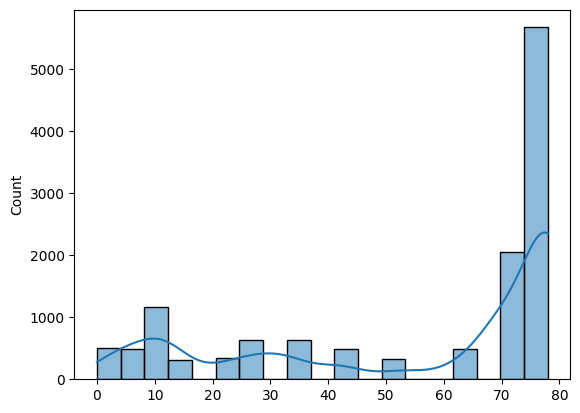

In [55]:
# Plot the predictions that were generated as a histogram using seaborn colored by correct vs incorrect predictions
sns.histplot(mlma_hate_speech_y_pred, kde=True)
plt.show()

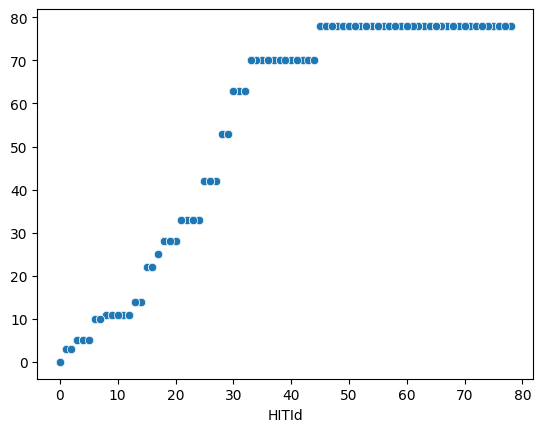

In [56]:
# Plot the predictions that were generated as a scatterplot plotted against the best correlated feature
sns.scatterplot(x=mlma_hate_speech_X_test_sample[mlma_hate_speech_best_correlated_feature], y=mlma_hate_speech_y_pred)
plt.show()

## Logistic Regression Conclusions

In [57]:
logistic_regression_model_results

[('Convabuse', 'l1', 'liblinear', 0.5239372268573699, 0.5262941973057333, 0.0),
 ('DGHS', 'l1', 'liblinear', 0.8377701634159199, 0.8067200502433663, 0.0),
 ('US2020HS', 'l1', 'saga', 0.5245283018867924, 0.5116279069767442, 0.0),
 ('MLMA Hate Speech',
  'l2',
  'newton-cholesky',
  0.06137541933516316,
  0.031464766234982344,
  0.0)]

In [58]:
# Combine the two results sets into a single logistic regression model summary
logistic_regression_model_summary = pd.concat([convabuse_results, dghs_results, us2020hs_results, mlma_hate_speech_results], ignore_index=True)
logistic_regression_model_summary

,Dataset,Regularizer,Solver,Accuracy,F1-score,Ratio
0,Convabuse,l1,liblinear,0.523937,0.526294,0.0
1,Convabuse,l1,saga,0.521951,0.525461,0.0
2,Convabuse,l2,lbfgs,0.523341,0.526871,0.0
3,Convabuse,l2,liblinear,0.523441,0.525801,0.0
4,Convabuse,l2,newton-cg,0.521752,0.525263,0.0
...,...,...,...,...,...,...
63,MLMA Hate Speech,elasticnet,saga,0.061375,0.031465,0.5
64,MLMA Hate Speech,elasticnet,saga,0.061375,0.031465,0.6
65,MLMA Hate Speech,elasticnet,saga,0.061375,0.031465,0.7
66,MLMA Hate Speech,elasticnet,saga,0.061375,0.031465,0.8


In [59]:
logistic_regression_model_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model4_logistic-regression-summary.csv", index=False)